**Comparison of the performance of Random Forest (RF), k-Nearest Neighbors (k-NN), Support Vector Machine (SVM), Classification And Regression Tree (CART), Naive Bayes (NB), and Minimum Distance (MD) for the detection of oil palm plantations. Each model is evaluated with a sequential feature selection.**

Adrià Descals - a.descals@creaf.uab.cat /
CREAF - Centre de Recerca Ecològica i Aplicacions Forestals


In [0]:
# Initialize Google Earth Engine
!pip install earthengine-api
!earthengine authenticate

import ee
try:
  ee.Initialize()
  print('The Earth Engine package initialized successfully!')
except ee.EEException as e:
  print('The Earth Engine package failed to initialize!')
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

# Import libraries and data

In [0]:
import numpy as np
import time
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from shapely.geometry import shape
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import r2_score
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# Function to Convert Feature Classes to Pandas Dataframe
def fc2df(fc):
    features = fc.getInfo()['features']
    dictarr = []
    for f in features:
        attr = f['properties']
        dictarr.append(attr)

    return pd.DataFrame(dictarr)


In [0]:
# load training dataset
assetID = 'users/adriadescals/shared/points_2019_05_27_1311X_Riau_paperPoints'
tableGEE = ee.FeatureCollection(assetID);
tableGEElist = tableGEE.toList(100000)

tableGEE1 = ee.FeatureCollection(tableGEElist.slice(0, 4000))
df =  fc2df(tableGEE1)

In [0]:
# change non-valid number to nan
df = df.replace([-9], np.nan).dropna()

In [0]:
# Create variable with predictive data and display all feature names
Xall = df.copy()
Xall = Xall.drop(['mean','Class','Class2','Class3','Class4','Class5','folder','longitude','latitude','zone'],axis='columns')
allBands = Xall.columns.tolist()

folders = df.folder

# Choose classification setup

In [0]:
cc = 1

if cc == 0: # classification setup I
  y = df.Class5.copy()
elif cc == 1: # classification setup Ii
  y = df.Class5.copy()
  y[y==2]=1
  y[y==4]=3    
elif cc == 2: # classification setup III
  y = df.Class5.copy()
  y[y==2]=5
  y[y==4]=5
  y[y==3]=1  
  
y2 = y.copy()

# Sequential Feature Selection RF

In [0]:
allBands = Xall.columns.tolist()
# print(allBands)

acc_all = np.empty((len(allBands),1,))
acc_all[:] = np.nan


for ff in range(0,len(allBands)):
  
    targetBand = allBands[ff]

    X2 = Xall[targetBand].copy()
    X2 = np.array([X2]).T       

    acc = np.empty((10,1,))
    acc[:] = np.nan

    X_train = X2[folders<3.5]
    y_train = y2[folders<3.5]
    X_test = X2[folders>3.5]
    y_test = y2[folders>3.5]
    model = RandomForestClassifier(n_estimators=40, random_state=35,min_samples_split=2,min_samples_leaf=3,max_features='sqrt',oob_score=0)
    model = model.fit(X_train, y_train)
    acc_ii=kappa_ii = cohen_kappa_score(model.predict(X_test), y_test)
    acc = acc_ii

    acc_all[ff] = acc

In [0]:
features = Xall.columns.values
print(np.max(acc_all))
print(np.argmax(acc_all))
print(allBands[np.argmax(acc_all)])

firstBands = allBands[np.argmax(acc_all)]

selectedKappa = np.empty((26,1,))
selectedKappa[:] = np.nan
selectedKappa[0] = np.max(acc_all)

0.6837863430330489
20
B12


In [0]:

selected_bands = [firstBands];
bands2 = allBands.copy()
bands2.remove(firstBands)

for iter in range(0,25):

  acc_all = np.empty((len(bands2),1,))
  acc_all[:] = np.nan

  #print(listTarget)

  for ff in range(0,len(bands2)):
      # split with folders
      
      
      listTarget = [bands2[ff]]
      listTarget.extend(selected_bands)
#       print(listTarget)
      
      X2 = df[listTarget]
      
      #y2= (df['Class']<5)


      acc = np.empty((10,1,))
      acc[:] = np.nan
      
      X_train = X2[folders<3.5]
      y_train = y2[folders<3.5]
      X_test = X2[folders>3.5]
      y_test = y2[folders>3.5]
      model = RandomForestClassifier(n_estimators=40, random_state=35,min_samples_split=2,min_samples_leaf=3,max_features='sqrt',oob_score=0)
      model = model.fit(X_train, y_train)
      acc_ii=kappa_ii = cohen_kappa_score(model.predict(X_test), y_test)
      acc = acc_ii

      acc_all[ff] = acc


  bandSelected = bands2[np.argmax(acc_all)]
  bands2.remove(bandSelected)
  selected_bands.append(bandSelected)
  selectedKappa[1+iter] = max(acc_all)
  print('iter'+str(iter))
  print(selected_bands)
print(selectedKappa[:,0])

iter0
['B12', 't0_vh_hist_smoothed2']
iter1
['B12', 't0_vh_hist_smoothed2', 't0_vv_hist_smoothed2']
iter2
['B12', 't0_vh_hist_smoothed2', 't0_vv_hist_smoothed2', 'B11_1']
iter3
['B12', 't0_vh_hist_smoothed2', 't0_vv_hist_smoothed2', 'B11_1', 't0_vv_smoothed2']
iter4
['B12', 't0_vh_hist_smoothed2', 't0_vv_hist_smoothed2', 'B11_1', 't0_vv_smoothed2', 'B7_savg']
iter5
['B12', 't0_vh_hist_smoothed2', 't0_vv_hist_smoothed2', 'B11_1', 't0_vv_smoothed2', 'B7_savg', 'B4_savg_1']
iter6
['B12', 't0_vh_hist_smoothed2', 't0_vv_hist_smoothed2', 'B11_1', 't0_vv_smoothed2', 'B7_savg', 'B4_savg_1', 't0_vh_smoothed2']
iter7
['B12', 't0_vh_hist_smoothed2', 't0_vv_hist_smoothed2', 'B11_1', 't0_vv_smoothed2', 'B7_savg', 'B4_savg_1', 't0_vh_smoothed2', 'evi_contrast_1']
iter8
['B12', 't0_vh_hist_smoothed2', 't0_vv_hist_smoothed2', 'B11_1', 't0_vv_smoothed2', 'B7_savg', 'B4_savg_1', 't0_vh_smoothed2', 'evi_contrast_1', 'B4_svar_1']
iter9
['B12', 't0_vh_hist_smoothed2', 't0_vv_hist_smoothed2', 'B11_1', 't0_v

# Sequential Feature Selection k-NN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
allBands = Xall.columns.tolist()

acc_all = np.empty((len(allBands),1,))
acc_all[:] = np.nan


for ff in range(0,len(allBands)):

    targetBand = allBands[ff]

    X2 = Xall[targetBand].copy()
    X2 = np.array([X2]).T       

    acc = np.empty((10,1,))
    acc[:] = np.nan

    X_train = X2[folders<3.5]
    y_train = y2[folders<3.5]
    X_test = X2[folders>3.5]
    y_test = y2[folders>3.5]
      
    X_train -= X_train.min()
    X_train /= X_train.max() 
    X_test -= X_test.min()
    X_test /= X_test.max() 

    if pd.Series(X_train[:,0]).isnull().values.any():
      acc = 0
    else:
      model = KNeighborsClassifier(n_neighbors=3)
      model.fit(X_train, y_train)
      acc_ii=kappa_ii = cohen_kappa_score(model.predict(X_test), y_test)
      acc = acc_ii

    acc_all[ff] = acc
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6

In [0]:
features = Xall.columns.values
print(np.max(acc_all))
print(np.argmax(acc_all))
print(allBands[np.argmax(acc_all)])

firstBands = allBands[np.argmax(acc_all)]

selectedKappa = np.empty((26,1,))
selectedKappa[:] = np.nan
selectedKappa[0] = np.max(acc_all)

0.6776322465805273
1
B11_1


In [0]:
selected_bands = [firstBands];
bands2 = allBands.copy()
bands2.remove(firstBands)

for iter in range(0,25):

  acc_all = np.empty((len(bands2),1,))
  acc_all[:] = np.nan


  for ff in range(0,len(bands2)):
      
      listTarget = [bands2[ff]]
      listTarget.extend(selected_bands)

      X2 = df[listTarget]
 

      acc = np.empty((10,1,))
      acc[:] = np.nan
      

      X_train = X2[folders<3.5]
      y_train = y2[folders<3.5]
      X_test = X2[folders>3.5]
      y_test = y2[folders>3.5]
        
      X_train -= X_train.min()
      X_train /= X_train.max() 
      X_test -= X_test.min()
      X_test /= X_test.max()    
        

      if pd.Series(X_train[bands2[ff]]).isnull().values.any():
        acc = 0
      else:
        model = KNeighborsClassifier(n_neighbors=3)
        model.fit(X_train, y_train)
        acc_ii=kappa_ii = cohen_kappa_score(model.predict(X_test), y_test)
        acc = acc_ii

      acc_all[ff] = acc


  bandSelected = bands2[np.argmax(acc_all)]
  bands2.remove(bandSelected)
  selected_bands.append(bandSelected)
  selectedKappa[1+iter] = max(acc_all)
  print('iter'+str(iter))
  print(selected_bands)
print(selectedKappa[:,0])

iter0
['B11_1', 't0_vh_hist_smoothed']
iter1
['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed']
iter2
['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed', 't0_vv_smoothed2']
iter3
['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed', 't0_vv_smoothed2', 'B4_savg_1']
iter4
['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed', 't0_vv_smoothed2', 'B4_savg_1', 't0_vv_hist_smoothed2']
iter5
['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed', 't0_vv_smoothed2', 'B4_savg_1', 't0_vv_hist_smoothed2', 'evi_idm_1']
iter6
['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed', 't0_vv_smoothed2', 'B4_savg_1', 't0_vv_hist_smoothed2', 'evi_idm_1', 'B4_prom_1']
iter7
['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed', 't0_vv_smoothed2', 'B4_savg_1', 't0_vv_hist_smoothed2', 'evi_idm_1', 'B4_prom_1', 't0_vv_smoothed2_prom']
iter8
['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed', 't0_vv_smoothed2', 'B4_savg_1', 't0_vv_hist_smoothed2', 'evi_idm_1', 'B4_prom_1', 't0_vv_smoothed2_pr

# Sequential Feature Selection SVM

In [0]:
from sklearn.svm import SVC

In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


allBands = Xall.columns.tolist()


acc_all = np.empty((len(allBands),1,))
acc_all[:] = np.nan


for ff in range(0,len(allBands)):
    targetBand = allBands[ff]

    X2 = Xall[targetBand].copy()
    X2 = np.array([X2]).T       

    acc = np.empty((10,1,))
    acc[:] = np.nan

    X_train = X2[folders<3.5]
    y_train = y2[folders<3.5]
    X_test = X2[folders>3.5]
    y_test = y2[folders>3.5]
      
    X_train -= X_train.min()
    X_train /= X_train.max() 
    X_test -= X_test.min()
    X_test /= X_test.max() 

    if pd.Series(X_train[:,0]).isnull().values.any():
      acc = 0
    else:
      model = SVC(kernel='rbf',C= 27, tol= 0.095)
      model.fit(X_train, y_train)
      acc_ii=kappa_ii = cohen_kappa_score(model.predict(X_test), y_test)
      acc = acc_ii

    acc_all[ff] = acc
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6

In [0]:
features = Xall.columns.values
print(np.max(acc_all))
print(np.argmax(acc_all))
print(allBands[np.argmax(acc_all)])

firstBands = allBands[np.argmax(acc_all)]

selectedKappa = np.empty((26,1,))
selectedKappa[:] = np.nan
selectedKappa[0] = np.max(acc_all)

0.6783092685083113
1
B11_1


In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

selected_bands = [firstBands];
bands2 = allBands.copy()
bands2.remove(firstBands)

for iter in range(0,25):

  acc_all = np.empty((len(bands2),1,))
  acc_all[:] = np.nan


  for ff in range(0,len(bands2)):

      
      listTarget = [bands2[ff]]
      listTarget.extend(selected_bands)

      X2 = df[listTarget]

      acc = np.empty((10,1,))
      acc[:] = np.nan
      

      X_train = X2[folders<3.5]
      y_train = y2[folders<3.5]
      X_test = X2[folders>3.5]
      y_test = y2[folders>3.5]
        
      X_train -= X_train.min()
      X_train /= X_train.max() 
      X_test -= X_test.min()
      X_test /= X_test.max()    
        

      if pd.Series(X_train[bands2[ff]]).isnull().values.any():
        acc = 0
      else:
        model = SVC(kernel='rbf',C= 27, tol= 0.095)
        model.fit(X_train, y_train)
        acc_ii=kappa_ii = cohen_kappa_score(model.predict(X_test), y_test)
        acc = acc_ii

      acc_all[ff] = acc


  bandSelected = bands2[np.argmax(acc_all)]
  bands2.remove(bandSelected)
  selected_bands.append(bandSelected)
  selectedKappa[1+iter] = max(acc_all)
  print('iter'+str(iter)+'  OA: '+str(acc))
  print(selected_bands)
print(selectedKappa[:,0])

iter0  OA: 0.7168703078516312
['B11_1', 't0_vh_hist_smoothed']
iter1  OA: 0.8341387479504534
['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed']
iter2  OA: 0.8837725807417978
['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed', 'B7_1']
iter3  OA: 0.9035849349306214
['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed', 'B7_1', 'B11']
iter4  OA: 0.90275849730307
['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed', 'B7_1', 'B11', 'B7']
iter5  OA: 0.9060921220485645
['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed', 'B7_1', 'B11', 'B7', 'B7_imcorr1']
iter6  OA: 0.9050534263175567
['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed', 'B7_1', 'B11', 'B7', 'B7_imcorr1', 'B8_ent']
iter7  OA: 0.8966845215468086
['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed', 'B7_1', 'B11', 'B7', 'B7_imcorr1', 'B8_ent', 'B11_idm']
iter8  OA: 0.9025500857260215
['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed', 'B7_1', 'B11', 'B7', 'B7_imcorr1', 'B8_ent', 'B11_idm', 'B11_savg']
ite

# Sequential Feature Selection NaiveBayes

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
allBands = Xall.columns.tolist()

acc_all = np.empty((len(allBands),1,))
acc_all[:] = np.nan


for ff in range(0,len(allBands)):

    targetBand = allBands[ff]

    X2 = Xall[targetBand].copy()
    X2 = np.array([X2]).T       

    acc = np.empty((10,1,))
    acc[:] = np.nan

    X_train = X2[folders<3.5]
    y_train = y2[folders<3.5]
    X_test = X2[folders>3.5]
    y_test = y2[folders>3.5]
      
    X_train -= X_train.min()
    X_train /= X_train.max() 
    X_test -= X_test.min()
    X_test /= X_test.max() 

    if pd.Series(X_train[:,0]).isnull().values.any():
      acc = 0
    else:
      model = GaussianNB(var_smoothing=1e-09)
      model = model.fit(X_train,y_train)
      acc_ii=kappa_ii = cohen_kappa_score(model.predict(X_test), y_test)
      acc = acc_ii

    acc_all[ff] = acc
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6

In [0]:
features = Xall.columns.values
print(np.max(acc_all))
print(np.argmax(acc_all))
print(allBands[np.argmax(acc_all)])

firstBands = allBands[np.argmax(acc_all)]

selectedKappa = np.empty((26,1,))
selectedKappa[:] = np.nan
selectedKappa[0] = np.max(acc_all)

0.3292409892108802
15
B11_savg


In [0]:
selected_bands = [firstBands];
bands2 = allBands.copy()
bands2.remove(firstBands)

for iter in range(0,25):

  acc_all = np.empty((len(bands2),1,))
  acc_all[:] = np.nan


  for ff in range(0,len(bands2)):
      
      listTarget = [bands2[ff]]
      listTarget.extend(selected_bands)

      X2 = df[listTarget]

      acc = np.empty((10,1,))
      acc[:] = np.nan
      

      X_train = X2[folders<3.5]
      y_train = y2[folders<3.5]
      X_test = X2[folders>3.5]
      y_test = y2[folders>3.5]
        
      X_train -= X_train.min()
      X_train /= X_train.max() 
      X_test -= X_test.min()
      X_test /= X_test.max()    
        

      if pd.Series(X_train[bands2[ff]]).isnull().values.any():
        acc = 0
      else:
        model = GaussianNB(var_smoothing=1e-09)
        model = model.fit(X_train,y_train)
        acc_ii=kappa_ii = cohen_kappa_score(model.predict(X_test), y_test)
        acc = acc_ii

      acc_all[ff] = acc


  bandSelected = bands2[np.argmax(acc_all)]
  bands2.remove(bandSelected)
  selected_bands.append(bandSelected)
  selectedKappa[1+iter] = max(acc_all)
  print('iter'+str(iter))
  print(selected_bands)
print(selectedKappa[:,0])

iter0
['B11_savg', 'B4_corr_1']
iter1
['B11_savg', 'B4_corr_1', 't0_vh']
iter2
['B11_savg', 'B4_corr_1', 't0_vh', 'evi_corr_1']
iter3
['B11_savg', 'B4_corr_1', 't0_vh', 'evi_corr_1', 'B7_imcorr1']
iter4
['B11_savg', 'B4_corr_1', 't0_vh', 'evi_corr_1', 'B7_imcorr1', 'B8_corr']
iter5
['B11_savg', 'B4_corr_1', 't0_vh', 'evi_corr_1', 'B7_imcorr1', 'B8_corr', 'B4_ent_1']
iter6
['B11_savg', 'B4_corr_1', 't0_vh', 'evi_corr_1', 'B7_imcorr1', 'B8_corr', 'B4_ent_1', 'random']
iter7
['B11_savg', 'B4_corr_1', 't0_vh', 'evi_corr_1', 'B7_imcorr1', 'B8_corr', 'B4_ent_1', 'random', 't0_vh_hist_smoothed']
iter8
['B11_savg', 'B4_corr_1', 't0_vh', 'evi_corr_1', 'B7_imcorr1', 'B8_corr', 'B4_ent_1', 'random', 't0_vh_hist_smoothed', 'B4_corr']
iter9
['B11_savg', 'B4_corr_1', 't0_vh', 'evi_corr_1', 'B7_imcorr1', 'B8_corr', 'B4_ent_1', 'random', 't0_vh_hist_smoothed', 'B4_corr', 'B4_dent_1']
iter10
['B11_savg', 'B4_corr_1', 't0_vh', 'evi_corr_1', 'B7_imcorr1', 'B8_corr', 'B4_ent_1', 'random', 't0_vh_hist_smoo

# Sequential Feature Selection minimumDistance (neareast centroid)

In [0]:
from sklearn.neighbors import NearestCentroid

In [0]:
allBands = Xall.columns.tolist()

acc_all = np.empty((len(allBands),1,))
acc_all[:] = np.nan


for ff in range(0,len(allBands)):

    targetBand = allBands[ff]

    X2 = Xall[targetBand].copy()
    X2 = np.array([X2]).T       

    acc = np.empty((10,1,))
    acc[:] = np.nan

    X_train = X2[folders<3.5]
    y_train = y2[folders<3.5]
    X_test = X2[folders>3.5]
    y_test = y2[folders>3.5]
      
    X_train -= X_train.min()
    X_train /= X_train.max() 
    X_test -= X_test.min()
    X_test /= X_test.max() 

    if pd.Series(X_train[:,0]).isnull().values.any():
      acc = 0
    else:
      model = NearestCentroid(shrink_threshold=None)
      model = model.fit(X_train,y_train)
      acc_ii=kappa_ii = cohen_kappa_score(model.predict(X_test), y_test)
      acc = acc_ii

    acc_all[ff] = acc
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6

In [0]:
features = Xall.columns.values
print(np.max(acc_all))
print(np.argmax(acc_all))
print(allBands[np.argmax(acc_all)])

firstBands = allBands[np.argmax(acc_all)]

selectedKappa = np.empty((26,1,))
selectedKappa[:] = np.nan
selectedKappa[0] = np.max(acc_all)

0.6447892010446477
172
t0_vv_smoothed2


In [0]:
selected_bands = [firstBands];
bands2 = allBands.copy()
bands2.remove(firstBands)

for iter in range(0,25):

  acc_all = np.empty((len(bands2),1,))
  acc_all[:] = np.nan

  for ff in range(0,len(bands2)):

      
      listTarget = [bands2[ff]]
      listTarget.extend(selected_bands)

      X2 = df[listTarget]

      acc = np.empty((10,1,))
      acc[:] = np.nan
      

      X_train = X2[folders<3.5]
      y_train = y2[folders<3.5]
      X_test = X2[folders>3.5]
      y_test = y2[folders>3.5]
        
      X_train -= X_train.min()
      X_train /= X_train.max() 
      X_test -= X_test.min()
      X_test /= X_test.max()    
        

      if pd.Series(X_train[bands2[ff]]).isnull().values.any():
        acc = 0
      else:
        model = NearestCentroid(shrink_threshold=None)
        model = model.fit(X_train,y_train)
        acc_ii=kappa_ii = cohen_kappa_score(model.predict(X_test), y_test)
        acc = acc_ii

      acc_all[ff] = acc


  bandSelected = bands2[np.argmax(acc_all)]
  bands2.remove(bandSelected)
  selected_bands.append(bandSelected)
  selectedKappa[1+iter] = max(acc_all)
  print('iter'+str(iter))
  print(selected_bands)
print(selectedKappa[:,0])

iter0
['t0_vv_smoothed2', 't0_vh_hist_smoothed']
iter1
['t0_vv_smoothed2', 't0_vh_hist_smoothed', 't0_vh_smoothed2']
iter2
['t0_vv_smoothed2', 't0_vh_hist_smoothed', 't0_vh_smoothed2', 'B6']
iter3
['t0_vv_smoothed2', 't0_vh_hist_smoothed', 't0_vh_smoothed2', 'B6', 'B11_asm']
iter4
['t0_vv_smoothed2', 't0_vh_hist_smoothed', 't0_vh_smoothed2', 'B6', 'B11_asm', 'evi_idm_1']
iter5
['t0_vv_smoothed2', 't0_vh_hist_smoothed', 't0_vh_smoothed2', 'B6', 'B11_asm', 'evi_idm_1', 'evi_shade']
iter6
['t0_vv_smoothed2', 't0_vh_hist_smoothed', 't0_vh_smoothed2', 'B6', 'B11_asm', 'evi_idm_1', 'evi_shade', 't0_vh_smoothed2_imcorr1']
iter7
['t0_vv_smoothed2', 't0_vh_hist_smoothed', 't0_vh_smoothed2', 'B6', 'B11_asm', 'evi_idm_1', 'evi_shade', 't0_vh_smoothed2_imcorr1', 'B4_prom']
iter8
['t0_vv_smoothed2', 't0_vh_hist_smoothed', 't0_vh_smoothed2', 'B6', 'B11_asm', 'evi_idm_1', 'evi_shade', 't0_vh_smoothed2_imcorr1', 'B4_prom', 't0_vv_smoothed2_imcorr1']
iter9
['t0_vv_smoothed2', 't0_vh_hist_smoothed', 't0

# Sequential Feature Selection CART


In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
allBands = Xall.columns.tolist()



acc_all = np.empty((len(allBands),1,))
acc_all[:] = np.nan


for ff in range(0,len(allBands)):

    targetBand = allBands[ff]

    X2 = Xall[targetBand].copy()
    X2 = np.array([X2]).T       

    acc = np.empty((10,1,))
    acc[:] = np.nan

    X_train = X2[folders<3.5]
    y_train = y2[folders<3.5]
    X_test = X2[folders>3.5]
    y_test = y2[folders>3.5]
      
    X_train -= X_train.min()
    X_train /= X_train.max() 
    X_test -= X_test.min()
    X_test /= X_test.max() 

    if pd.Series(X_train[:,0]).isnull().values.any():
      acc = 0
    else:
      model = DecisionTreeClassifier(max_depth= 8, max_features= 0.8, min_samples_leaf= 1,random_state=SEED)
      model = model.fit(X_train,y_train)
      acc_ii=kappa_ii = cohen_kappa_score(model.predict(X_test), y_test)
      acc = acc_ii

    acc_all[ff] = acc
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6

In [0]:
features = Xall.columns.values
print(np.max(acc_all))
print(np.argmax(acc_all))
print(allBands[np.argmax(acc_all)])

firstBands = allBands[np.argmax(acc_all)]

selectedKappa = np.empty((26,1,))
selectedKappa[:] = np.nan
selectedKappa[0] = np.max(acc_all)

0.6837535951686399
1
B11_1


In [0]:
selected_bands = [firstBands];
bands2 = allBands.copy()
bands2.remove(firstBands)

for iter in range(0,25):

  acc_all = np.empty((len(bands2),1,))
  acc_all[:] = np.nan

  for ff in range(0,len(bands2)):

      listTarget = [bands2[ff]]
      listTarget.extend(selected_bands)
 
      X2 = df[listTarget]

      acc = np.empty((10,1,))
      acc[:] = np.nan
      

      X_train = X2[folders<3.5]
      y_train = y2[folders<3.5]
      X_test = X2[folders>3.5]
      y_test = y2[folders>3.5]
        

      if pd.Series(X_train[bands2[ff]]).isnull().values.any():
        acc = 0
      else:
        model = DecisionTreeClassifier(max_depth= 8, max_features= 0.8, min_samples_leaf= 1,random_state=SEED)
        model = model.fit(X_train,y_train)
        acc_ii=kappa_ii = cohen_kappa_score(model.predict(X_test), y_test)
        acc = acc_ii

      acc_all[ff] = acc


  bandSelected = bands2[np.argmax(acc_all)]
  bands2.remove(bandSelected)
  selected_bands.append(bandSelected)
  selectedKappa[1+iter] = max(acc_all)
  print('iter'+str(iter))
  print(selected_bands)
print(selectedKappa[:,0])

iter0
['B11_1', 't0_vh_smoothed2']
iter1
['B11_1', 't0_vh_smoothed2', 't0_vv_hist_smoothed2']
iter2
['B11_1', 't0_vh_smoothed2', 't0_vv_hist_smoothed2', 't0_vh_hist_smoothed2']
iter3
['B11_1', 't0_vh_smoothed2', 't0_vv_hist_smoothed2', 't0_vh_hist_smoothed2', 'B7_savg']
iter4
['B11_1', 't0_vh_smoothed2', 't0_vv_hist_smoothed2', 't0_vh_hist_smoothed2', 'B7_savg', 'B7_ent']
iter5
['B11_1', 't0_vh_smoothed2', 't0_vv_hist_smoothed2', 't0_vh_hist_smoothed2', 'B7_savg', 'B7_ent', 'B4_1']
iter6
['B11_1', 't0_vh_smoothed2', 't0_vv_hist_smoothed2', 't0_vh_hist_smoothed2', 'B7_savg', 'B7_ent', 'B4_1', 'B11_savg']
iter7
['B11_1', 't0_vh_smoothed2', 't0_vv_hist_smoothed2', 't0_vh_hist_smoothed2', 'B7_savg', 'B7_ent', 'B4_1', 'B11_savg', 'evi_savg']
iter8
['B11_1', 't0_vh_smoothed2', 't0_vv_hist_smoothed2', 't0_vh_hist_smoothed2', 'B7_savg', 'B7_ent', 'B4_1', 'B11_savg', 'evi_savg', 't0_vh_smoothed2_imcorr2']
iter9
['B11_1', 't0_vh_smoothed2', 't0_vv_hist_smoothed2', 't0_vh_hist_smoothed2', 'B7_sav

# Figure model comparison - setup1

In [0]:
# RESULTS OF THE SFS for the first band (random forest)

bands_RF = ['B11_savg', 't0_vh_smoothed2_savg', 'B4_corr_1', 't0_vv_hist_smoothed2', 'B8_savg', 'B4_svar_1', 't0_vv_smoothed2_imcorr2', 't0_vh_hist_smoothed2', 't0_vv_smoothed2', 'evi_imcorr1_1', 'B4_1', 'evi_corr_1', 't0_vh', 'B4_savg_1', 't0_vv_smoothed2_prom', 'B3', 'B3_1', 'evi_corr', 't0_vv_smoothed2_savg', 'B11_var', 'B4_dvar_1', 'B7_dent', 't0_vh_smoothed2', 'evi_diss_1', 'B4_diss_1', 'B4_shade_1']
Kappa_RF = [0.43421035,0.67352213,0.76734338,0.81452153,0.85923672,0.87757079
,0.8889467,0.89704634,0.90512151,0.90337865,0.91266378,0.91047976
,0.91313158,0.91956551,0.92071636,0.92018597,0.91587398,0.92070538
,0.91742227,0.91644194,0.9196061,0.92286039,0.92064354,0.91629871
,0.92825763,0.92611886]
print('max Kappa_RF:')
print(max(Kappa_RF))

# RESULTS OF THE SFS for the first band (k-NN)

bands_kNN = ['B11_savg', 't0_vh_hist_smoothed', 'B4_corr_1', 't0_vv_hist_smoothed', 't0_vh', 'B7_savg', 't0_vh_smoothed2_savg', 'B4_var_1', 't0_vv_smoothed2', 'B7_asm', 't0_vv_smoothed2_imcorr1', 't0_vv_smoothed2_sent', 't0_vv_smoothed2_idm', 'B8_imcorr2', 'evi_asm', 'evi_asm_1', 't0_vh_smoothed2_asm', 't0_vh_smoothed2_ent', 't0_vh_smoothed2_imcorr2', 't0_vv_smoothed2_asm', 't0_vv_smoothed2_ent', 't0_vv_smoothed2_imcorr2', 't0_vh_smoothed2_idm', 'B8_idm', 't0_vh_smoothed2_sent', 'B8_asm']
Kappa_kNN = [0.38304269,0.56285095,0.68228515,0.74430484,0.78331805,0.80945346
,0.82088552,0.83940279,0.84961429,0.85239285,0.85353102,0.85518361
,0.85627741,0.85680844,0.85680844,0.85680844,0.85680844,0.85680844
,0.85680844,0.85680844,0.85680844,0.85680844,0.85625064,0.85612361
,0.85608997,0.85500686]
print('max Kappa_kNN:')
print(max(Kappa_kNN))


bands_SVM = ['B11_savg', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed', 'B4_corr_1', 'B4_savg_1', 't0_vv_smoothed2', 't0_vh_smoothed2_savg', 'B8_savg', 't0_vh', 'B11', 't0_vh_smoothed2_dent', 'B4_imcorr2_1', 'evi_imcorr2_1', 't0_vv_hist_smoothed2', 'B4_ent_1', 'evi_dent_1', 'B4_sent', 't0_vh_smoothed2_shade', 'evi_shade_1', 'evi_dvar_1', 'B4_svar', 'evi_diss_1', 'B7_dent', 't0_vv_smoothed2_sent', 'B4_diss_1', 'evi_ent_1']
Kappa_SVM = [0.47441102,0.60732036,0.69559092,0.75504912,0.80110925,0.80962149
,0.83307069,0.8465609,0.85345684,0.85765098,0.86261982,0.86478074
,0.8679397,0.87293762,0.87620614,0.8838177,0.88546344,0.88842258
,0.88879741,0.8930699,0.89306985,0.89362165,0.89359431,0.89517015
,0.89578673,0.89799835]
print('max Kappa_SVM:')
print(max(Kappa_SVM))

bands_NN = ['B11_savg', 't0_vh', 'B8_var', 't0_vv', 'evi_imcorr2_1', 't0_vv_smoothed3', 'B4_corr_1', 'B4_diss_1', 't0_vv_smoothed2_ent', 't0_vv_hist_smoothed2', 't0_vh_smoothed2_savg', 'B8_contrast', 't0_vh_smoothed2_sent', 'B6', 'B4_contrast', 'B8_ent', 'B8_savg', 't0_vv_smoothed2_prom', 'evi_imcorr1', 'B11_svar', 'B8_imcorr1', 't0_vh_smoothed2_ent', 'B4_var_1', 'B4_prom', 'B11_dent', 'B8_prom']
Kappa_NN = [0.48186225,0.54690327,0.62335317,0.65316636,0.67762458,0.69248489
,0.7356263,0.75966055,0.75505474,0.76834707,0.80748302,0.80264243
,0.82387167,0.81759668,0.81635092,0.81963604,0.82829253,0.82598446
,0.82475421,0.83004221,0.82357074,0.83756975,0.82434134,0.82120811
,0.82776728,0.82616873]
print('max Kappa_NN:')
print(max(Kappa_NN))

bands_NB = ['B11_savg', 't0_vh', 'B4_corr_1', 'B7_savg', 't0_vh_smoothed2_savg', 't0_vv_hist_smoothed', 'B4_diss_1', 't0_vh_hist_smoothed', 'B4_savg_1', 't0_vv_smoothed2_corr', 'B4_corr', 'B8_diss', 'random', 'B11', 'evi_corr_1', 't0_vh_smoothed2_corr', 'evi_shade_1', 't0_vv_smoothed2_savg', 'evi_dvar_1', 'B4_dent_1', 'evi_savg_1', 'evi_imcorr1_1', 'B7_imcorr1', 't0_vv_smoothed2', 'B6', 'B4_idm_1']
Kappa_NB =[0.51123696,0.63037376,0.69780207,0.72398515,0.74147411,0.74754475
,0.75733975,0.76687326,0.76599879,0.77198678,0.77037517,0.77207955
,0.77217799,0.76611388,0.76631538,0.76684962,0.76640411,0.7678326
,0.76752612,0.76747472,0.7629114,0.76116927,0.77049514,0.77477042
,0.78083609,0.78096635]
print('max Kappa_NB:')
print(max(Kappa_NB))

bands_MD = ['B11_savg', 't0_vh_smoothed2_savg', 't0_vv_smoothed2_savg', 't0_vv_hist_smoothed', 'evi_ent_1', 'B11_shade', 'B11_idm', 't0_vh', 't0_vh_hist_smoothed', 't0_vv_smoothed3', 't0_vv_smoothed2_dent', 't0_vv_smoothed2', 't0_vv_smoothed2_dvar', 't0_vv_smoothed2_svar', 'B7_asm', 'B4_prom', 't0_vh_smoothed2_prom', 't0_vh_smoothed2_imcorr1', 't0_vv_smoothed2_prom', 'B11_prom', 'evi_prom_1', 'evi_idm_1', 'B8_dent', 't0_vv_smoothed2_imcorr1', 'B7_prom', 'B8_imcorr2']
Kappa_MD =[0.36393044,0.51867978,0.59484168,0.64316579,0.66502841,0.67858304
,0.69595141,0.71571166,0.72842328,0.7324935,0.74164633,0.74911338
,0.75442208,0.75444797,0.75547853,0.75551949,0.7565891,0.75561321
,0.75559002,0.75505042,0.75464445,0.75696798,0.75814358,0.75874052
,0.75825023,0.75824845]
print('max Kappa_kNN:')
print(max(Kappa_kNN))

bands_CART = ['B11_savg', 't0_vh_smoothed2', 'evi_corr_1', 't0_vv_hist_smoothed2', 't0_vv_smoothed3', 'B8_1', 'evi_prom_1', 'B4_dvar_1', 'evi_savg_1', 't0_vh', 'B7_savg', 'B11_shade', 't0_vh_hist_smoothed2', 't0_vv_smoothed2', 'B11_1', 'B11_maxcorr', 't0_vh_smoothed2_savg', 'evi_imcorr1_1', 'B4_maxcorr', 'B4_1', 'B4_sent', 'B11', 'B4_maxcorr_1', 'B4_savg_1', 't0_vv_smoothed2_corr', 'B4_shade_1']
Kappa_CART = [0.47081843,0.65620706,0.75408325,0.79124826,0.82088158,0.82840057
,0.83669788,0.82679131,0.83121745,0.83140994,0.84233724,0.83797624
,0.84299738,0.83535654,0.84072891,0.83580171,0.84359716,0.84378048
,0.84035941,0.84389707,0.84205053,0.83923138,0.84972245,0.83719789
,0.84495969,0.84917171]
print('max Kappa_CART:')
print(max(Kappa_CART))

max Kappa_RF:
0.92825763
max Kappa_kNN:
0.85680844
max Kappa_SVM:
0.89799835
max Kappa_NN:
0.83756975
max Kappa_NB:
0.78096635
max Kappa_kNN:
0.85680844
max Kappa_CART:
0.84972245


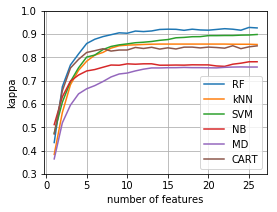

In [0]:
x = np.linspace(1, 26, num=26)

%matplotlib inline
plt.figure(figsize=(4,3))
plt.plot(x, Kappa_RF, label="RF") 
plt.plot(x, Kappa_kNN, label="kNN") 
plt.plot(x, Kappa_SVM, label="SVM")
plt.plot(x, Kappa_NB, label="NB") 
plt.plot(x, Kappa_MD, label="MD") 
plt.plot(x, Kappa_CART, label="CART") 
plt.ylabel('kappa') 
plt.ylim(0.3,1)
plt.xlabel('number of features') 
plt.grid()
plt.legend()

# plt.savefig('ModelComparison1.svg')
# files.download('ModelComparison1.svg')

# Figure model comparison - setup2

In [0]:

bands_RF = ['t0_vh_smoothed2', 'B11_savg', 'evi_corr_1', 't0_vv_hist_smoothed2', 'B4_contrast_1', 'B8_savg', 't0_vv', 't0_vv_smoothed2_savg', 't0_vv_hist_smoothed', 'B11_asm', 'B7_diss', 't0_vv_smoothed2_sent', 't0_vh_hist_smoothed2', 't0_vv_smoothed2', 't0_vv_smoothed2_corr', 'B4_imcorr1', 'B7_1', 'evi_savg_1', 'evi_dvar_1', 'B7_dent', 'B8_corr', 'evi_imcorr2_1', 't0_vv_smoothed2_shade', 'B8_var', 'B4_corr', 'B4_shade_1']
Kappa_RF = [0.39349906,0.68680416,0.80424794,0.85481128,0.88259679,0.89726339
,0.90556792,0.91764233,0.90680097,0.91510824,0.91508439,0.91827026
,0.91952969,0.92463123,0.93095859,0.92523436,0.92206419,0.92333039
,0.92780536,0.9278153,0.92459865,0.92652173,0.93035955,0.92584563
,0.92579066,0.92082676]
print('max Kappa_RF:')
print(max(Kappa_RF))

bands_kNN = ['B11_savg', 't0_vh_hist_smoothed', 'B4_corr_1', 't0_vv_smoothed2', 't0_vv_hist_smoothed', 't0_vh_smoothed2_savg', 'B8_savg', 'B4_contrast_1', 't0_vv_smoothed2_savg', 'evi_ent_1', 't0_vh_smoothed2_imcorr1', 't0_vv_smoothed2_idm', 'evi_shade', 'B4_prom', 'evi_asm', 'evi_asm_1', 't0_vh_smoothed2_asm', 't0_vh_smoothed2_ent', 't0_vh_smoothed2_imcorr2', 't0_vh_smoothed2_prom', 't0_vh_smoothed2_shade', 't0_vv_smoothed2_prom', 'B8_asm', 'B8_imcorr2', 't0_vv_smoothed2_asm', 't0_vv_smoothed2_ent']
Kappa_kNN = [0.31181325,0.551543,0.68301982,0.74135173,0.7813544,0.80119258
,0.82390346,0.8428034,0.84870829,0.85834383,0.86088285,0.86216375
,0.86285266,0.86598502,0.86598502,0.86598502,0.86598502,0.86598502
,0.86598502,0.86598502,0.86735377,0.86799842,0.86800023,0.86800023
,0.86800023,0.86800023]
print('max Kappa_kNN:')
print(max(Kappa_kNN))

bands_SVM = ['B11_savg', 'B4_corr_1', 't0_vh', 't0_vv_smoothed2_savg', 't0_vh_smoothed2_savg', 'evi_corr_1', 't0_vv_hist_smoothed', 'B7_savg', 'evi_savg', 'B2', 'B11_diss', 't0_vv_smoothed2', 't0_vh_hist_smoothed', 'B4_dent_1', 'B4_idm_1', 'B4_contrast_1', 't0_vv_smoothed2_dvar', 't0_vv_smoothed2_dent', 'evi_dent', 't0_vv_smoothed2_imcorr2', 'B4_asm_1', 'B11_var', 'B11_prom', 't0_vh_smoothed2_dent', 'B7_asm', 'B8_imcorr1']
Kappa_SVM = [0.330934,0.47824289,0.62997298,0.6966338,0.73872566,0.78424059
,0.80474071,0.83499233,0.84454613,0.85341941,0.85459667,0.85737464
,0.86056605,0.86961519,0.8834936,0.88787446,0.8878929,0.88839396
,0.89534203,0.8941272,0.89281442,0.89285487,0.89095962,0.8897174
,0.89099026,0.8903753,]
print('max Kappa_SVM:')
print(max(Kappa_SVM))

bands_NB = ['B11_savg', 'B4_corr_1', 't0_vh', 'evi_corr_1', 'B7_imcorr1', 'B8_corr', 'B4_ent_1', 'random', 't0_vh_hist_smoothed', 'B4_corr', 'B4_dent_1', 'evi_imcorr2_1', 'evi_shade_1', 'B4_svar_1', 'B7_idm', 't0_vh_smoothed2_savg', 'B8', 't0_vh_smoothed2_corr', 'evi_imcorr1', 't0_vv_smoothed2_corr', 'B4_2', 'B11_imcorr1', 'B4_sent', 'evi_prom_1', 'B4_var_1', 'B7_corr']
Kappa_NB = [0.32924099,0.48912844,0.59126697,0.64106471,0.65822802,0.6694727
,0.67198238,0.67523521,0.67237588,0.68036429,0.68332786,0.69054853
,0.68428395,0.69206551,0.68912315,0.68780458,0.69164545,0.69080849
,0.69039151,0.68931632,0.68812188,0.68557384,0.68238493,0.67771782
,0.67762198,0.67171307]
print('max Kappa_NB:')
print(max(Kappa_NB))


bands_MD = ['t0_vh_hist_smoothed', 't0_vv_hist_smoothed2', 't0_vh_smoothed3', 'evi_shade', 't0_vh', 'B7_asm', 't0_vh_smoothed2_sent', 'B11_prom', 't0_vh_smoothed2_imcorr1', 't0_vh_smoothed2_imcorr2', 't0_vv_smoothed2_imcorr2', 't0_vh_smoothed2_asm', 'evi_asm', 't0_vv_smoothed2_asm', 'B8_imcorr2', 't0_vv_smoothed2_prom', 't0_vv_smoothed2_imcorr1', 'B4_svar', 't0_vv_smoothed2_contrast', 'B4_var', 'B4_prom', 't0_vv_smoothed2_sent', 'B8_idm', 'evi_asm_1', 't0_vh_smoothed2_idm', 't0_vv_smoothed2_idm']
Kappa_MD = [0.33878965,0.44516581,0.5564532,0.57777606,0.59005244,0.59216993
,0.59231658,0.59296695,0.59510193,0.593079,0.59304839,0.59883969
,0.5984526,0.60076622,0.60042974,0.5977564,0.59325286,0.59437993
,0.5945535,0.59555,0.60556351,0.61182806,0.61187665,0.61106497
,0.60954693,0.60403735]
print('max Kappa_MD:')
print(max(Kappa_MD))

bands_CART = ['B11_savg', 't0_vh_smoothed2', 'evi_corr_1', 't0_vv_hist_smoothed2', 'B4_contrast_1', 'B8A', 'B7_savg', 't0_vv_smoothed2_savg', 't0_vv_smoothed2_diss', 't0_vv_smoothed3', 'B7', 't0_vh_hist_smoothed2', 'B4_inertia_1', 'B4_asm_1', 'B11_maxcorr', 't0_vv', 'B4_maxcorr', 'evi_savg', 'B8_corr', 't0_vv_smoothed2', 'B4_maxcorr_1', 't0_vh', 'B4_shade', 't0_vh_smoothed2_shade', 'B11_1', 'B7_maxcorr']
Kappa_CART = [0.44392547,0.67348691,0.76698775,0.81343994,0.83606964,0.85024486
,0.84823686,0.86474502,0.86446933,0.8567221,0.84897344,0.85994212
,0.85973141,0.87054356,0.84832227,0.85579547,0.8591879,0.8487388
,0.85422527,0.8413359,0.84258375,0.8616574,0.855724,0.85066909
,0.84610925,0.85472453]
print('max Kappa_CART:')
print(max(Kappa_CART))

max Kappa_RF:
0.93095859
max Kappa_kNN:
0.86800023
max Kappa_SVM:
0.89534203
max Kappa_NB:
0.69206551
max Kappa_MD:
0.61187665
max Kappa_CART:
0.87054356


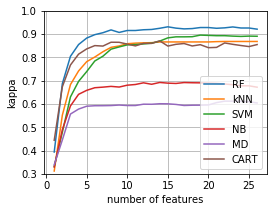

In [0]:
x = np.linspace(1, 26, num=26)

%matplotlib inline
plt.figure(figsize=(4,3))
plt.plot(x, Kappa_RF, label="RF") 
plt.plot(x, Kappa_kNN, label="kNN") 
plt.plot(x, Kappa_SVM, label="SVM")
plt.plot(x, Kappa_NB, label="NB") 
plt.plot(x, Kappa_MD, label="MD") 
plt.plot(x, Kappa_CART, label="CART") 
plt.ylabel('kappa') 
plt.ylim(0.3,1)
plt.xlabel('number of features') 
plt.grid()
plt.legend()

# plt.savefig('ModelComparison2.svg')
# files.download('ModelComparison2.svg')

# Figure model comparison - setup3

In [0]:

bands_RF = ['B12', 't0_vh_hist_smoothed2', 't0_vv_hist_smoothed2', 'B11_1', 't0_vv_smoothed2', 'B7_savg', 'B4_savg_1', 't0_vh_smoothed2', 'evi_contrast_1', 'B4_svar_1', 't0_vh_smoothed2_savg', 't0_vv_hist_smoothed', 'B8_diss', 'B8A_1', 'B4_1', 'evi_dent', 'B8_1', 'evi_savg_1', 'B11_savg', 'B8_imcorr2', 't0_vv_smoothed2_savg', 'B8_var', 'B11_var', 'evi_dent_1', 'evi_diss', 'evi_sent']
Kappa_RF = [0.68378634,0.86028289,0.92504218,0.93341623,0.94171083,0.94253514
,0.94669147,0.94839255,0.95420806,0.95421251,0.95253827,0.94587698
,0.94920762,0.94587171,0.95087773,0.95587322,0.94753719,0.95336866
,0.95087295,0.95753838,0.95672055,0.95338228,0.95420806,0.95670369
,0.95337774,0.95087295]
print('max Kappa_RF:')
print(max(Kappa_RF))


bands_kNN = ['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed', 't0_vv_smoothed2', 'B4_savg_1', 't0_vv_hist_smoothed2', 'evi_idm_1', 'B4_prom_1', 't0_vv_smoothed2_prom', 'B8_imcorr2', 'evi_asm', 'evi_asm_1', 't0_vh_smoothed2_asm', 't0_vh_smoothed2_ent', 't0_vh_smoothed2_idm', 't0_vh_smoothed2_imcorr2', 't0_vv_smoothed2_asm', 't0_vv_smoothed2_ent', 't0_vv_smoothed2_imcorr2', 't0_vv_smoothed2_sent', 'B8_prom', 't0_vv_smoothed2_idm', 'B7_asm', 'B4_asm', 't0_vh_smoothed2_imcorr1', 't0_vv_smoothed3']
Kappa_kNN = [0.67763225,0.84488141,0.90378137,0.92109692,0.93185115,0.94507908
,0.95007675,0.95507345,0.95590757,0.95590757,0.95590757,0.95590757
,0.95590757,0.95590757,0.95590757,0.95590757,0.95590757,0.95590757
,0.95590757,0.95507782,0.95508219,0.95425261,0.95425261,0.95259829
,0.9542615,0.95507345]
print('max Kappa_kNN:')
print(max(Kappa_kNN))


bands_SVM = ['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed', 'B7_1', 'B11', 'B7', 'B7_imcorr1', 'B8_ent', 'B11_idm', 'B11_savg', 'B4_diss_1', 't0_vh_smoothed2_corr', 'B8A_1', 'B4_contrast', 'B8_savg', 'B11_diss', 'B4_imcorr1_1', 't0_vv_smoothed2_idm', 'B4_savg_1', 'evi_idm_1', 'B11_corr', 't0_vv_smoothed2_imcorr1', 'B6_1', 'evi_dent_1', 'B4_diss', 'B11_contrast']
Kappa_SVM = [0.67830927,0.75741249,0.87903807,0.90285294,0.90699097,0.90948668
,0.91175073,0.91509743,0.91678649,0.91763065,0.91845076,0.92006057
,0.92092022,0.92174121,0.92007613,0.92009948,0.92177168,0.92178691
,0.92095101,0.9226152,0.92179452,0.92097408,0.92007613,0.92013835
,0.91927897,0.91927897]
print('max Kappa_SVM:')
print(max(Kappa_SVM))

bands_NB = ['B11_1', 't0_vh_hist_smoothed', 't0_vv_hist_smoothed2', 't0_vh', 'evi_idm_1', 'B4_prom', 'random', 'B4_shade', 'B11', 't0_vv_smoothed2', 't0_vv_smoothed2_prom', 'B4_corr_1', 'B7_dent', 'B7_idm', 't0_vh_smoothed2_savg', 'evi_imcorr2', 'evi_corr', 'B11_idm', 'B6', 'B8_imcorr1', 'B4_shade_1', 'B4_corr', 'B4_asm', 'B4_imcorr2', 'evi_imcorr1_1', 'B4_ent']
Kappa_NB = [0.70723624,0.82292271,0.871501,0.88169864,0.89509993,0.89589699
,0.89840041,0.8984202,0.89774193,0.90005624,0.90005624,0.8984103
,0.8984103,0.89837071,0.90329349,0.90497011,0.90494231,0.90495158
,0.90504418,0.90755652,0.90591837,0.90590921,0.90508117,0.90508117
,0.90503492,0.90501641]
print('max Kappa_NB:')
print(max(Kappa_NB))


bands_MD = ['t0_vv_smoothed2', 't0_vh_hist_smoothed', 't0_vh_smoothed2', 'B6', 'B11_asm', 'evi_idm_1', 'evi_shade', 't0_vh_smoothed2_imcorr1', 'B4_prom', 't0_vv_smoothed2_imcorr1', 't0_vv_smoothed2_prom', 'B4_shade', 'B8_imcorr2', 'evi_asm', 'B11_imcorr2', 'B7_asm', 't0_vh_smoothed2_idm', 't0_vh_smoothed3', 'B11_prom', 't0_vh_smoothed2_asm', 'evi_asm_1', 't0_vh_smoothed2_imcorr2', 't0_vv_smoothed2_sent', 't0_vh_smoothed2_sent', 't0_vv_smoothed2_imcorr2', 'B8_asm']
Kappa_MD = [0.6447892,0.75538684,0.8127031,0.84246165,0.84337435,0.84648085
,0.85406974,0.85572804,0.85572804,0.85490593,0.85490593,0.85655024
,0.85490593,0.85408389,0.85397061,0.85642491,0.85646671,0.85823611
,0.85905831,0.85907197,0.85661976,0.85333305,0.85416874,0.85254015
,0.85171891,0.85009119]
print('max Kappa_MD:')
print(max(Kappa_MD))


bands_CART = ['B11_1', 't0_vh_smoothed2', 't0_vv_hist_smoothed2', 't0_vh_hist_smoothed2', 'B7_savg', 'B7_ent', 'B4_1', 'B11_savg', 'evi_savg', 't0_vh_smoothed2_imcorr2', 'B11_maxcorr', 'B4_imcorr1', 't0_vv_hist_smoothed', 'B8A', 'B12_1', 'B4_maxcorr', 't0_vv_smoothed2', 'B4_maxcorr_1', 'B4_asm_1', 'B12', 'B7_maxcorr', 'B4_corr', 't0_vv_smoothed3', 'B4_svar', 'B8_maxcorr', 'B8_1']
Kappa_CART = [0.6837536,0.84909485,0.90187491,0.91268955,0.92435301,0.9259868
,0.91012066,0.91013815,0.92595799,0.92341375,0.92595079,0.92760777
,0.92843638,0.92931323,0.92600839,0.91508916,0.9176627,0.92930636
,0.93178484,0.92013835,0.89438566,0.9276289,0.90671916,0.92092022
,0.91348321,0.91587657]
print('max Kappa_CART:')
print(max(Kappa_CART))


max Kappa_RF:
0.95753838
max Kappa_kNN:
0.95590757
max Kappa_SVM:
0.9226152
max Kappa_NB:
0.90755652
max Kappa_MD:
0.85907197
max Kappa_CART:
0.93178484


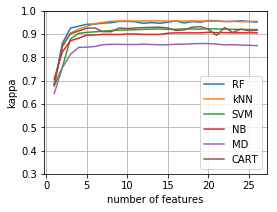

In [0]:
x = np.linspace(1, 26, num=26)

%matplotlib inline
plt.figure(figsize=(4,3))
plt.plot(x, Kappa_RF, label="RF") 
plt.plot(x, Kappa_kNN, label="kNN") 
plt.plot(x, Kappa_SVM, label="SVM")
plt.plot(x, Kappa_NB, label="NB") 
plt.plot(x, Kappa_MD, label="MD") 
plt.plot(x, Kappa_CART, label="CART") 
plt.ylim(0.3,1)
plt.ylabel('kappa') 
plt.xlabel('number of features') 
plt.grid()
plt.legend()


# plt.savefig('ModelComparison3.svg')
# files.download('ModelComparison3.svg')